In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.model_selection import train_test_split 
import xgboost as xgb 
from matplotlib import pyplot
# feature selection    make sure to update xgboost package
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform,randint
from xgboost import plot_importance

In [17]:
# Function importing Dataset 
def read_data(path): 
    df = pd.read_csv(path, na_values='NA')
    # Printing the dataswet shape 
    print ("features:") 
    print (list(df.columns)) 
    print ("row and column number") 
    print (df.shape) 
    print ("data / feature types:") 
    print (df.dtypes) 
    df_num = df.select_dtypes(include='number')
    df_cat = df.select_dtypes(include='object')
    print ("missing values:") 
    print (df.isnull().sum()) 
    return [df, df_num, df_cat] 



path = './../data/train_liberty.csv'
dflist = read_data(path)

df = dflist[0]
predictor = list(df.columns)

df.Hazard.value_counts()

df_cat = df.select_dtypes(include='object')

cat_names = list(df_cat.columns)
for it in cat_names:
    df_1 = pd.get_dummies(df[it])
    colnames = list(df_1.columns)
    colnames_new = [it + "_" + str(colname) for colname in colnames]
    df_1.columns = colnames_new
    df = pd.concat([df, df_1], axis=1)

list(df.columns)


features:
['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13', 'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3', 'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15']
row and column number
(50999, 34)
data / feature types:
Id         int64
Hazard     int64
T1_V1      int64
T1_V2      int64
T1_V3      int64
T1_V4     object
T1_V5     object
T1_V6     object
T1_V7     object
T1_V8     object
T1_V9     object
T1_V10     int64
T1_V11    object
T1_V12    object
T1_V13     int64
T1_V14     int64
T1_V15    object
T1_V16    object
T1_V17    object
T2_V1      int64
T2_V2      int64
T2_V3     object
T2_V4      int64
T2_V5     object
T2_V6      int64
T2_V7      int64
T2_V8      int64
T2_V9      int64
T2_V10     int64
T2_V11    object
T2_V12    object
T2_V13    object
T2_V14     int64
T2_V15     int64
dtype: object
missing values:
Id     

['Id',
 'Hazard',
 'T1_V1',
 'T1_V2',
 'T1_V3',
 'T1_V4',
 'T1_V5',
 'T1_V6',
 'T1_V7',
 'T1_V8',
 'T1_V9',
 'T1_V10',
 'T1_V11',
 'T1_V12',
 'T1_V13',
 'T1_V14',
 'T1_V15',
 'T1_V16',
 'T1_V17',
 'T2_V1',
 'T2_V2',
 'T2_V3',
 'T2_V4',
 'T2_V5',
 'T2_V6',
 'T2_V7',
 'T2_V8',
 'T2_V9',
 'T2_V10',
 'T2_V11',
 'T2_V12',
 'T2_V13',
 'T2_V14',
 'T2_V15',
 'T1_V4_B',
 'T1_V4_C',
 'T1_V4_E',
 'T1_V4_G',
 'T1_V4_H',
 'T1_V4_N',
 'T1_V4_S',
 'T1_V4_W',
 'T1_V5_A',
 'T1_V5_B',
 'T1_V5_C',
 'T1_V5_D',
 'T1_V5_E',
 'T1_V5_H',
 'T1_V5_I',
 'T1_V5_J',
 'T1_V5_K',
 'T1_V5_L',
 'T1_V6_N',
 'T1_V6_Y',
 'T1_V7_A',
 'T1_V7_B',
 'T1_V7_C',
 'T1_V7_D',
 'T1_V8_A',
 'T1_V8_B',
 'T1_V8_C',
 'T1_V8_D',
 'T1_V9_B',
 'T1_V9_C',
 'T1_V9_D',
 'T1_V9_E',
 'T1_V9_F',
 'T1_V9_G',
 'T1_V11_A',
 'T1_V11_B',
 'T1_V11_D',
 'T1_V11_E',
 'T1_V11_F',
 'T1_V11_H',
 'T1_V11_I',
 'T1_V11_J',
 'T1_V11_K',
 'T1_V11_L',
 'T1_V11_M',
 'T1_V11_N',
 'T1_V12_A',
 'T1_V12_B',
 'T1_V12_C',
 'T1_V12_D',
 'T1_V15_A',
 'T1_V15_C',
 'T1_V

In [18]:
df.drop(cat_names, axis = 1, inplace = True)
predictor = list(df.columns)

df.dtypes
df.head(5)

for s in ['Id', 'Hazard']:
    predictor.remove(s)
    
print (predictor)

X = df[predictor]
y = df.Hazard

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=2)



['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15', 'T1_V4_B', 'T1_V4_C', 'T1_V4_E', 'T1_V4_G', 'T1_V4_H', 'T1_V4_N', 'T1_V4_S', 'T1_V4_W', 'T1_V5_A', 'T1_V5_B', 'T1_V5_C', 'T1_V5_D', 'T1_V5_E', 'T1_V5_H', 'T1_V5_I', 'T1_V5_J', 'T1_V5_K', 'T1_V5_L', 'T1_V6_N', 'T1_V6_Y', 'T1_V7_A', 'T1_V7_B', 'T1_V7_C', 'T1_V7_D', 'T1_V8_A', 'T1_V8_B', 'T1_V8_C', 'T1_V8_D', 'T1_V9_B', 'T1_V9_C', 'T1_V9_D', 'T1_V9_E', 'T1_V9_F', 'T1_V9_G', 'T1_V11_A', 'T1_V11_B', 'T1_V11_D', 'T1_V11_E', 'T1_V11_F', 'T1_V11_H', 'T1_V11_I', 'T1_V11_J', 'T1_V11_K', 'T1_V11_L', 'T1_V11_M', 'T1_V11_N', 'T1_V12_A', 'T1_V12_B', 'T1_V12_C', 'T1_V12_D', 'T1_V15_A', 'T1_V15_C', 'T1_V15_D', 'T1_V15_F', 'T1_V15_H', 'T1_V15_N', 'T1_V15_S', 'T1_V15_W', 'T1_V16_A', 'T1_V16_B', 'T1_V16_C', 'T1_V16_D', 'T1_V16_E', 'T1_V16_F', 'T1_V16_G', 'T1_V16_H', 'T1_V16_I', 'T1_V16_J', 'T1_V16_K', 'T1_V16_L', 'T1_V16_M', 'T1_V16_N', 'T1_V16_O', 'T1_V16

In [21]:
dtrain = xgb.DMatrix(data=X_train,
                     feature_names=X_train.columns,
                     label=y_train)

dvalid = xgb.DMatrix(data=X_valid,
                     feature_names=X_valid.columns,
                     label=y_valid)

set(df.Hazard)
set(y_valid)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 40,
 42}

In [22]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.01
params["min_child_weight"] = 5
params["subsample"] = 1
params["scale_pos_weight"] = 1.0
params["silent"] = 1
params["max_depth"] = 7
params["tree_method"] = 'gpu_hist'
params["sampling_method"] = 'gradient_based'

In [23]:
plst = list(params.items())

watchlist = [(dtrain, 'train'),(dvalid, 'val')]
model = xgb.train(plst, dtrain, 500, watchlist, early_stopping_rounds=5)

e:\udemy\xgboost\xgboost_env\Lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[00:12:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:12:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-rmse:5.30626	val-rmse:5.36048
[1]	train-rmse:5.28026	val-rmse:5.33518
[2]	train-rmse:5.25465	val-rmse:5.31040
[3]	train-rmse:5.22948	val-rmse:5.28591
[4]	train-rmse:5.20474	val-rmse:5.26179
[5]	train-rmse:5.18043	val-rmse:5.23812
[6]	train-rmse:5.15643	val-rmse:5.21476
[7]	train-rmse:5.13284	val-rmse:5.19190
[8]	train-rmse:5.10955	val-rmse:5.16923
[9]	train-rmse:5.08658	val-rmse:5.14704
[10]	train-rmse:5.06390	val-rmse:5.12505
[11]	train-rmse:5.04167	val-rmse:5.10354
[12]	train-rmse:5.01981	val-rmse:5.08234
[13]	train-rmse:4.99831	val-rmse:5.06146
[14]	trai

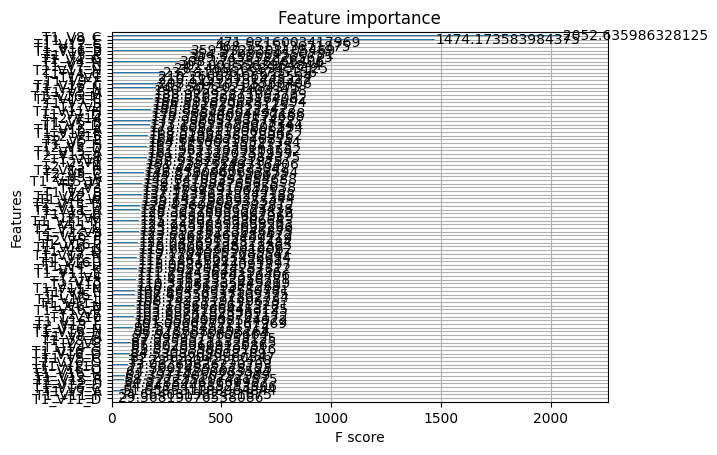

In [24]:
# plot feature importance
plot_importance(model, importance_type='gain')
pyplot.show()

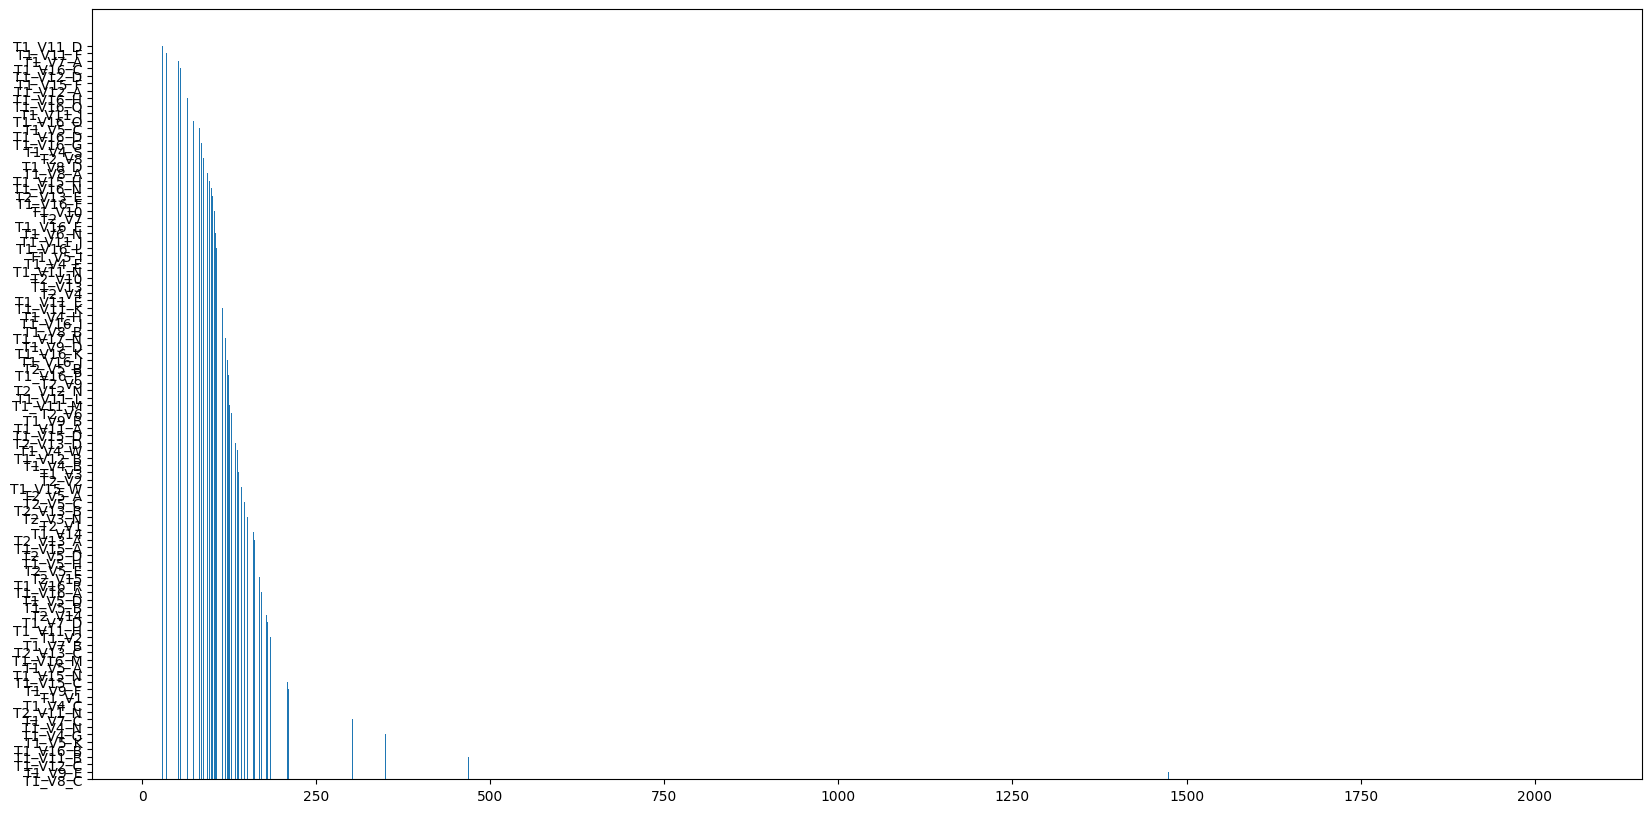

In [25]:
#  we use the following ways
imp_gain = model.get_score(importance_type="gain")
imp_weight = model.get_score(importance_type="weight")

important_values = list(imp_gain.values())
important_vars = list(imp_gain.keys())
sorted_idx = np.argsort(important_values)[::-1]
important_var_gain = [(important_vars[index], important_values[index]) for index in sorted_idx]

important_values = list(imp_weight.values())
important_vars = list(imp_weight.keys())
sorted_idx = np.argsort(important_values)[::-1]
important_var_weight = [(important_vars[index], important_values[index]) for index in sorted_idx]

import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.DataFrame(important_var_gain, columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
plt.bar(feature_imp.Feature, feature_imp.Value)
plt.show()


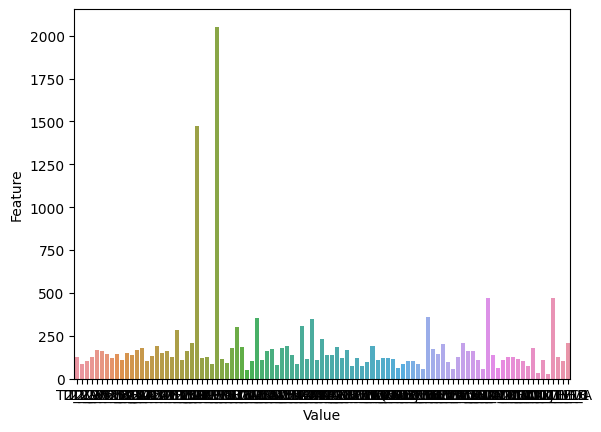

In [26]:
# other way seaborn for importance levels
pic=sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
pic.figure.savefig('importance.png')
